# Reading the contents of a folder

The code below can be used to read the contents of a folder on your computer. 

In [2]:
import os
from os.path import join


dir = 'Corpus'

for file in os.listdir( dir ):
    if re.search( r'[.]txt' , file ):
        print( join( dir , file ) )




Corpus/ARoomWithaView.txt
Corpus/ATaleofTwoCities.txt
Corpus/HeartofDarkness.txt
Corpus/Ivanhoe.txt
Corpus/MobyDick.txt
Corpus/PrideandPrejudice.txt
Corpus/SonsandLovers.txt
Corpus/ThroughtheLookingGlass.txt
Corpus/TreasureIsland.txt
Corpus/VanityFair.txt


## Average number of words per sentence

The code below establishes the total number of words and the total number of words for all the texts in the folder 'Corpus'. Using these two numbers, it is possible to calculate the average number of words per sentence for each text.
Try to add some code which visualise the average number of words per sentence via a bar chart. You can use the code of listing 4.1 as a basis: https://github.com/peterverhaar/dtdp/blob/master/Tutorial/Part4/Exercises/exercise4-1.py


Analysing Corpus/ARoomWithaView.txt...
Analysing Corpus/ATaleofTwoCities.txt...
Analysing Corpus/HeartofDarkness.txt...
Analysing Corpus/Ivanhoe.txt...
Analysing Corpus/MobyDick.txt...
Analysing Corpus/PrideandPrejudice.txt...
Analysing Corpus/SonsandLovers.txt...
Analysing Corpus/ThroughtheLookingGlass.txt...
Analysing Corpus/TreasureIsland.txt...
Analysing Corpus/VanityFair.txt...


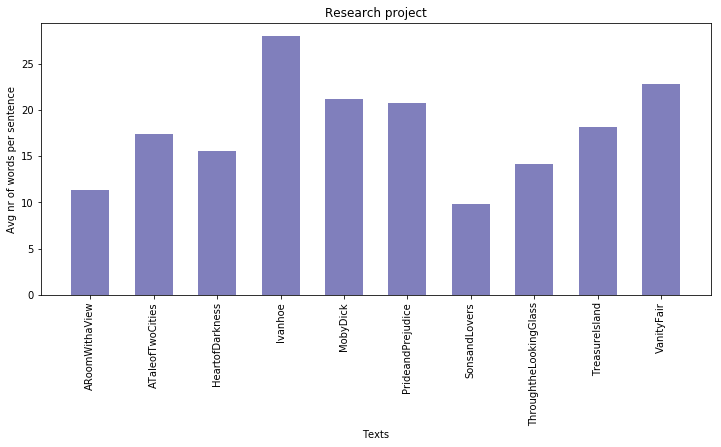

In [18]:
import os
from os.path import join

import dtdpTdm as tdm
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

dir = 'Corpus'

titles = []
sentenceLength = []


for file in os.listdir( dir ):
    if re.search( r'[.]txt' , file ):
        
        fullPath = join( dir , file )
        print( 'Analysing ' +  fullPath + '...' )
        tokens = tdm.numberOfTokens( fullPath )
        sentences = tdm.numberOfSentences( fullPath )
        
        sentenceLength.append( tokens / sentences  ) 

        
        title = re.sub( r'\.txt' , '' , file )
        titles.append( title )
        

%matplotlib inline 
import matplotlib.pyplot as plt

fig = plt.figure( figsize=( 12 , 5 ) )
ax = plt.axes()

ax.bar( titles , sentenceLength , width = 0.6 , alpha = 0.5 , color = '#03017a')

ax.set_xlabel('Texts')
ax.set_ylabel('Avg nr of words per sentence')
ax.set_title( 'Research project')

## labels for the ticks on the X-axis need to
## be shown vertically to improve the readability
plt.xticks(rotation=90)

plt.show()

        



## Number of syllables

The dtdpTdm module includes a method named countSyllables. Test the correctness.

In [15]:
print( d.countSyllables("beauty") )
print( d.countSyllables("believe") )
print( d.countSyllables("university") )

2
2
5


## Average length of words and average length of sentences

Can you create a scatter plot which visualises both the average length of words (i.e. the average number of syllables per word) and average length of sentences (i.e. the number of words)?
You may reuse code from listing 4.3, which was discussed in part 4 of the tutorial: https://github.com/peterverhaar/dtdp/blob/master/Tutorial/Part4/Examples/listing4-3.py or
https://github.com/peterverhaar/dtdp/blob/master/Tutorial/Part4/Exercises/exercise4-4.py

ARoomWithaView
ATaleofTwoCities
HeartofDarkness
Ivanhoe
MobyDick
PrideandPrejudice
SonsandLovers
ThroughtheLookingGlass
TreasureIsland
VanityFair


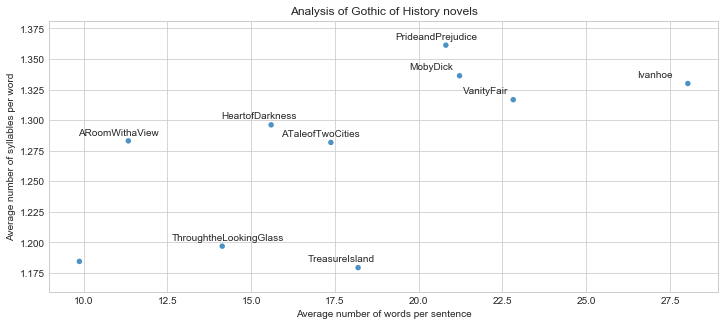

In [31]:
import os
from os.path import join
import dtdpTdm as tdm
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

dir = 'Corpus'

titles = []
sentLength = []
wordLength = []

for file in os.listdir( dir ):
    if re.search( r'[.]txt' , file ):
        
        title = re.sub( r'\.txt' , '' , file )
        titles.append( title )
        print(title)
        
        fullPath = join( dir , file )

        tokens = tdm.numberOfTokens( fullPath )
        syllables = tdm.numberOfSyllables( fullPath )
        
        tokens = tdm.numberOfTokens( fullPath )
        sentences = tdm.numberOfSentences( fullPath )
        
        sentLength.append(  tokens / sentences )
        wordLength.append( syllables / tokens )
        
%matplotlib inline 
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')



fig = plt.figure( figsize=( 12 , 5 )  )
ax = plt.axes()

ax.scatter( sentLength , wordLength , alpha=0.8,  edgecolors='none', s=30, label=None )


for i in range( 0 , len( titles ) ):
    ax.annotate( titles[i] , ( sentLength[i] -1.5 , wordLength[i] + 0.005 )  )


ax.set_xlabel('Average number of words per sentence')
ax.set_ylabel('Average number of syllables per word')



plt.title('Matplot scatter plot')


ax.set_title( 'Analysis of Gothic of History novels' )

plt.show()


## type-token ratio curves


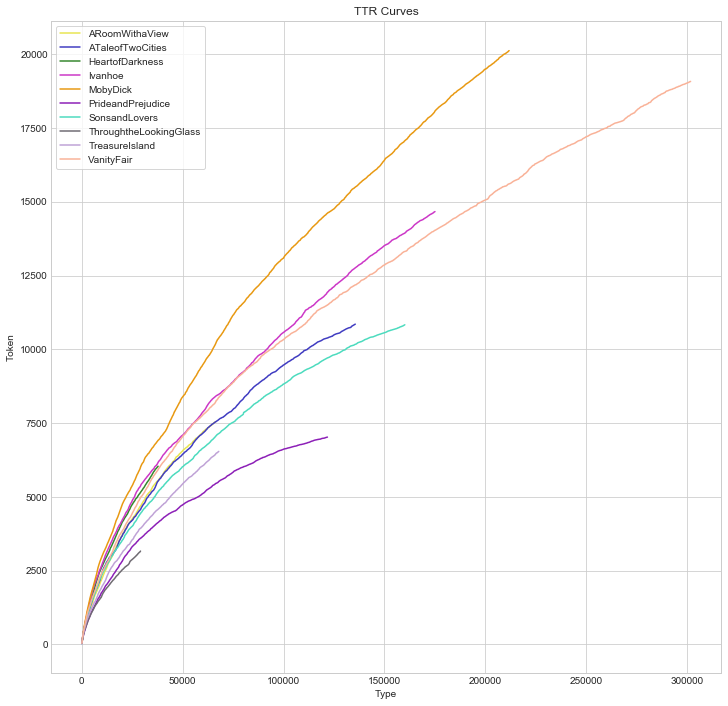

In [41]:
import os
from os.path import join
import dtdpTdm as tdm
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

dir = 'Corpus'

colours = [ '#e8e551' , '#403cc1' , '#35872d' , '#cc37c7' , '#e89912' , '#8c1fb7' , '#4cdbbe' , '#6f6b72' , '#bfa2d6' , '#f9b298' , '#efef07' , '#63e24f' , '#f311f7' ]

files = []
titles = []

for file in os.listdir( dir ):
    if re.search( r'[.]txt' , file ):
        files.append( join( dir , file ) )
        title = re.sub( r'\.txt' , '' , file )
        titles.append( title )
        

        
%matplotlib inline       
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure( figsize=( 12 , 12 ) )
ax = plt.axes()

for i in range( 0 , len(files) ):
    ttr = tdm.typeTokenRatioCurve( files[i] , 50 )
    ax.plot( ttr.keys() , ttr.values() , label = titles[i] , color = colours[i] , linestyle = 'solid')

ax.set_xlabel('Type')
ax.set_ylabel('Token')

ax.set_title( 'TTR Curves')

plt.legend(loc=2 , frameon=True )

plt.show()        
        

# Complexity

Analysing Corpus/ARoomWithaView.txt...
Analysing Corpus/ATaleofTwoCities.txt...
Analysing Corpus/HeartofDarkness.txt...
Analysing Corpus/Ivanhoe.txt...
Analysing Corpus/MobyDick.txt...
Analysing Corpus/PrideandPrejudice.txt...
Analysing Corpus/SonsandLovers.txt...
Analysing Corpus/ThroughtheLookingGlass.txt...
Analysing Corpus/TreasureIsland.txt...
Analysing Corpus/VanityFair.txt...


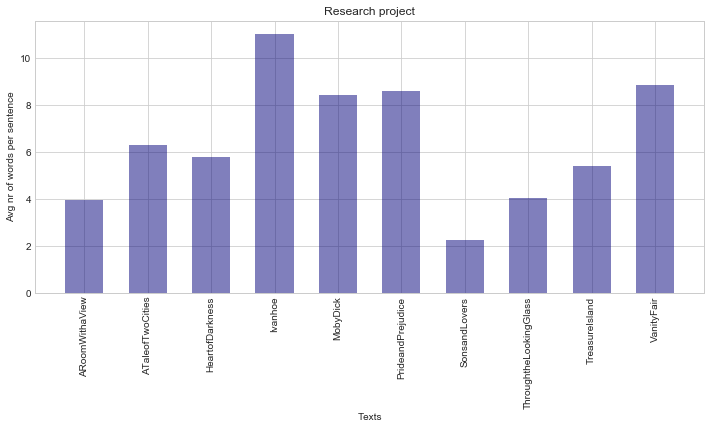

In [42]:
import os
from os.path import join

import dtdpTdm as tdm
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

dir = 'Corpus'

titles = []
fk = []


for file in os.listdir( dir ):
    if re.search( r'[.]txt' , file ):
        
        fullPath = join( dir , file )
        print( 'Analysing ' +  fullPath + '...' )
        tokens = tdm.numberOfTokens( fullPath )
        
        title = re.sub( r'\.txt' , '' , file )
        titles.append( title )
        
        score = tdm.fleschKincaid( fullPath )
        fk.append(score)
        

%matplotlib inline 
import matplotlib.pyplot as plt

fig = plt.figure( figsize=( 12 , 5 ) )
ax = plt.axes()

ax.bar( titles , fk , width = 0.6 , alpha = 0.5 , color = '#03017a')

ax.set_xlabel('Texts')
ax.set_ylabel('Avg nr of words per sentence')
ax.set_title( 'Research project')

## labels for the ticks on the X-axis need to
## be shown vertically to improve the readability
plt.xticks(rotation=90)

plt.show()


# Simple sentiment analysis

ARoomWithaView
ATaleofTwoCities
HeartofDarkness
Ivanhoe
MobyDick
PrideandPrejudice
SonsandLovers
ThroughtheLookingGlass
TreasureIsland
VanityFair


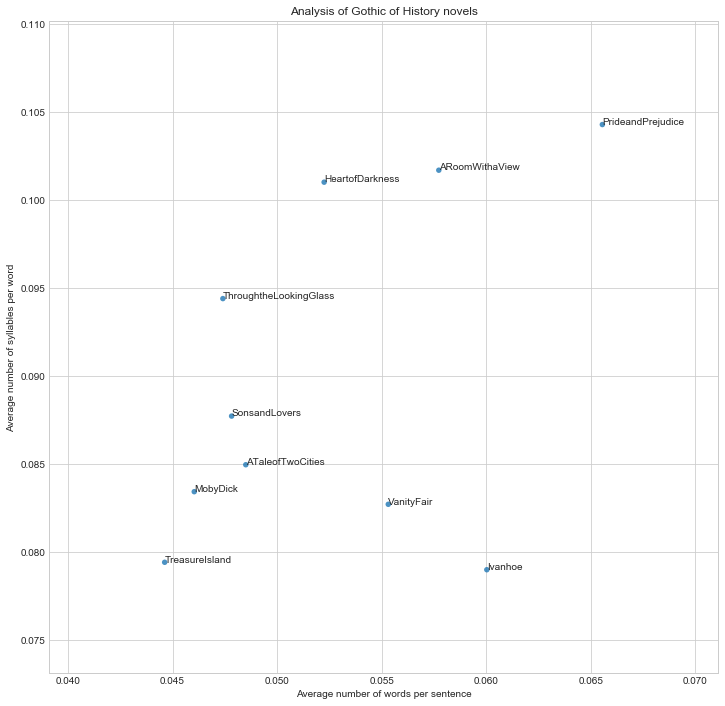

In [2]:
import os
from os.path import join
import dtdpTdm as tdm
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

dir = 'Corpus'

titles = []
positive = []
negative = []

for file in os.listdir( dir ):
    if re.search( r'[.]txt' , file ):
        
        title = re.sub( r'\.txt' , '' , file )
        titles.append( title )
        print(title)
        
        fullPath = join( dir , file )
        tokens = tdm.numberOfTokens( fullPath )
        count = tdm.countOccurrencesLexicon( fullPath , 'positive.txt' )
        positive.append(count/tokens)
        count = tdm.countOccurrencesLexicon( fullPath , 'negative.txt' )
        negative.append(count/tokens)

        
        
%matplotlib inline 
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')



fig = plt.figure( figsize=( 12 , 12 )  )
ax = plt.axes()

ax.scatter( positive , negative , alpha=0.8,  edgecolors='none', s=30, label=None )


for i in range( 0 , len( titles ) ):
    ax.annotate( titles[i] , ( positive[i] , negative[i]  )  )


ax.set_xlabel('Average number of words per sentence')
ax.set_ylabel('Average number of syllables per word')



plt.title('Matplot scatter plot')


ax.set_title( 'Analysis of Gothic of History novels' )

plt.show()